<a href="https://colab.research.google.com/github/MahdiNavaei/Bank_Personal_Loan_Modelling/blob/main/Bank_Personal_Loan_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas_profiling as pdp
import scipy.stats as stats
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as py
# pip install bubbly
from bubbly.bubbly import bubbleplot
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics, tree
from mlxtend.plotting import plot_decision_regions
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
%matplotlib inline

In [7]:
# read the CSV file and create a DataFrame object
df=pd.DataFrame(pd.read_csv('/content/sample_data/Bank_Personal_Loan_Modelling.csv'))
df

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

Target: Personal Loan

age: age of the customer

Experience: years of experience of the customer

Income: annual income of the customer

ZIP Code: zip code of the customer's location

Family: number of members in the customer's family

CCAvg: average spending on credit cards per month

Education: education level of the customer

Mortgage: value of the house the customer lives in

Personal Loan: whether the customer wants a personal loan or not

Securities Account: whether the customer has a securities account with the bank or not

CD Account: whether the customer has a certificate of deposit account or not

Online: whether the customer uses online banking services or not

CreditCard: whether the customer has a credit card or not

In [8]:
# Display information about the dataframe including columns, non-null count, and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [10]:
# Create a function to check the dataframe for columns, data types, unique values, and null values

def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 
# Call the check function on the dataframe to return a new dataframe containing column information
check(df)

column   dtypes  nunique  sum_null
0                   ID    int64     5000         0
1                  Age    int64       45         0
2           Experience    int64       47         0
3               Income    int64      162         0
4             ZIP Code    int64      467         0
5               Family    int64        4         0
6                CCAvg  float64      108         0
7            Education    int64        3         0
8             Mortgage    int64      347         0
9        Personal Loan    int64        2         0
10  Securities Account    int64        2         0
11          CD Account    int64        2         0
12              Online    int64        2         0
13          CreditCard    int64        2         0

In [11]:
# Drop the 'ID' column from the dataframe

df.drop(['ID'], axis=1, inplace=True)
df.head()

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   25           1      49     91107       4    1.6          1         0   
1   45          19      34     90089       3    1.5          1         0   
2   39          15      11     94720       1    1.0          1         0   
3   35           9     100     94112       1    2.7          2         0   
4   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [13]:
# Store descriptive statistics of the dataframe in a temporary dataframe
temp = df.describe()
# Display the descriptive statistics with an orange gradient
temp.style.background_gradient(cmap='Oranges')

In the work experience section, it shows the minimum as -3, which is incorrect.

In the ZIP code section, it shows that the minimum value probably has one digit less, so it should be removed.

In [14]:
df[df['Experience']<0]


Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
89     25          -1     113     94303       4   2.30          3         0   
226    24          -1      39     94085       2   1.70          2         0   
315    24          -2      51     90630       3   0.30          3         0   
451    28          -2      48     94132       2   1.75          3        89   
524    24          -1      75     93014       4   0.20          1         0   
536    25          -1      43     92173       3   2.40          2       176   
540    25          -1     109     94010       4   2.30          3       314   
576    25          -1      48     92870       3   0.30          3         0   
583    24          -1      38     95045       2   1.70          2         0   
597    24          -2     125     92835       2   7.20          1         0   
649    25          -1      82     92677       4   2.10          3         0   
670    23          -1      61     92374       4   2.60          1       239   
686    24          -1      38     92612       4   0.60          2         0   
793    24          -2     150     94720       2   2.00          1         0   
889    24          -2      82     91103       2   1.60          3         0   
909    23          -1     149     91709       1   6.33          1       305   
1173   24          -1      35     94305       2   1.70          2         0   
1428   25          -1      21     94583       4   0.40          1        90   
1522   25          -1     101     94720       4   2.30          3       256   
1905   25          -1     112     92507       2   2.00          1       241   
2102   25          -1      81     92647       2   1.60          3         0   
2430   23          -1      73     92120       4   2.60          1         0   
2466   24          -2      80     94105       2   1.60          3         0   
2545   25          -1      39     94720       3   2.40          2         0   
2618   23          -3      55     92704       3   2.40          2       145   
2717   23          -2      45     95422       4   0.60          2         0   
2848   24          -1      78     94720       2   1.80          2         0   
2876   24          -2      80     91107       2   1.60          3       238   
2962   23          -2      81     91711       2   1.80          2         0   
2980   25          -1      53     94305       3   2.40          2         0   
3076   29          -1      62     92672       2   1.75          3         0   
3130   23          -2      82     92152       2   1.80          2         0   
3157   23          -1      13     94720       4   1.00          1        84   
3279   26          -1      44     94901       1   2.00          2         0   
3284   25          -1     101     95819       4   2.10          3         0   
3292   25          -1      13     95616       4   0.40          1         0   
3394   25          -1     113     90089       4   2.10          3         0   
3425   23          -1      12     91605       4   1.00          1        90   
3626   24          -3      28     90089       4   1.00          3         0   
3796   24          -2      50     94920       3   2.40          2         0   
3824   23          -1      12     95064       4   1.00          1         0   
3887   24          -2     118     92634       2   7.20          1         0   
3946   25          -1      40     93117       3   2.40          2         0   
4015   25          -1     139     93106       2   2.00          1         0   
4088   29          -1      71     94801       2   1.75          3         0   
4116   24          -2     135     90065       2   7.20          1         0   
4285   23          -3     149     93555       2   7.20          1         0   
4411   23          -2      75     90291       2   1.80          2         0   
4481   25          -2      35     95045       4   1.00          3         0   
4514   24          -3      41     91768       4   1.00  

In [15]:
df.Experience = df.Experience.replace(-1, 1)
df.Experience = df.Experience.replace(-2, 2)
df.Experience = df.Experience.replace(-3, 1)

In [16]:
zipco= df.sort_values('ZIP Code')
zipco


Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
384    51          25      21      9307       4   0.60          3         0   
652    34           9      92     90005       1   2.80          1         0   
1619   45          21      29     90005       1   0.30          3         0   
1681   32           8     141     90005       2   4.33          1         0   
4186   33           9      10     90005       4   1.00          1        81   
...   ...         ...     ...       ...     ...    ...        ...       ...   
3525   59          34      13     96651       4   0.90          2         0   
1426   37          11      60     96651       3   0.50          3         0   
2731   29           5      28     96651       1   0.20          3         0   
672    51          27      23     96651       1   0.20          1         0   
1653   26           1      24     96651       2   0.90          3       123   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
384               0                   0           0       1           1  
652               0                   0           0       1           0  
1619              0                   0           0       1           0  
1681              0                   0           0       0           0  
4186              0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
3525              0                   0           0       0           0  
1426              0                   0           0       1           0  
2731              0                   0           0       1           0  
672               0                   0           0       1           0  
1653              0                   0           0       0           1  

[5000 rows x 13 columns]

In [17]:
zipnoise = df[df['ZIP Code'] == 9307]
df.drop(zipnoise.index,inplace=True)

In [18]:
num_col=['Age','Experience','Income','ZIP Code','CCAvg','Mortgage']
cat_col=['Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']

In [19]:
# With this advanced plot, we want to examine the relationship between age, experience, and other factors relative to income.
figure = bubbleplot(dataset = df, x_column = 'Experience', y_column = 'Income', 
    bubble_column = 'Personal Loan', time_column = 'Age', size_column = 'Mortgage', color_column = 'Personal Loan', 
    x_title = "Experience", y_title = "Income", title = 'Experience vs Income. vs Age vs Mortgage vs Personal Loan',
    x_logscale = False, scale_bubble = 3, height = 650)

py.iplot(figure, config={'scrollzoom': True})

/usr/local/lib/python3.9/dist-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.9/dist-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.9/dist-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.9/dist-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.9/dist-packages/bubbly/bubbly.py:184: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/pytho

In [20]:
# Set the plot style to 'fivethirtyeight'
plt.style.use('fivethirtyeight')

# Define a function to create a histogram plot for a given variable
def fig (df,var):
    # Create a histogram plot with the specified variable as both the x-axis and the color, using the 'plotly_dark' template
    fig2 = px.histogram(df,x=var,color=var,template='plotly_dark')
    # Display the plot
    fig2.show()

In [21]:
# Create histogram plots for each categorical column in the dataset
for i in cat_col:
    fig(df,i)


In [29]:
# Define a function to create a combined boxplot and histogram plot for a given feature
def histogram_boxplot(feature, figsize=(15, 7), bins=None):
    """ 
    Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15,10))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='yellow') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=True, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=True, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='blue', linestyle='-');# Add median to the histogram

In [25]:
def create_outliers(feature: str, data=df):
    """ 
    Returns dataframe object of feature outliers.
    feature: 1-d feature array
    data: pandas dataframe (default is df)
    """
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    #print(((df.Mileage < (Q1 - 1.5 * IQR)) | (df.Mileage > (Q3 + 1.5 * IQR))).sum())
    return data[((data[feature] < (Q1 - 1.5 * IQR)) | (data[feature] > (Q3 + 1.5 * IQR)))]

<ipython-input-29-1d215e6707da>:16: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




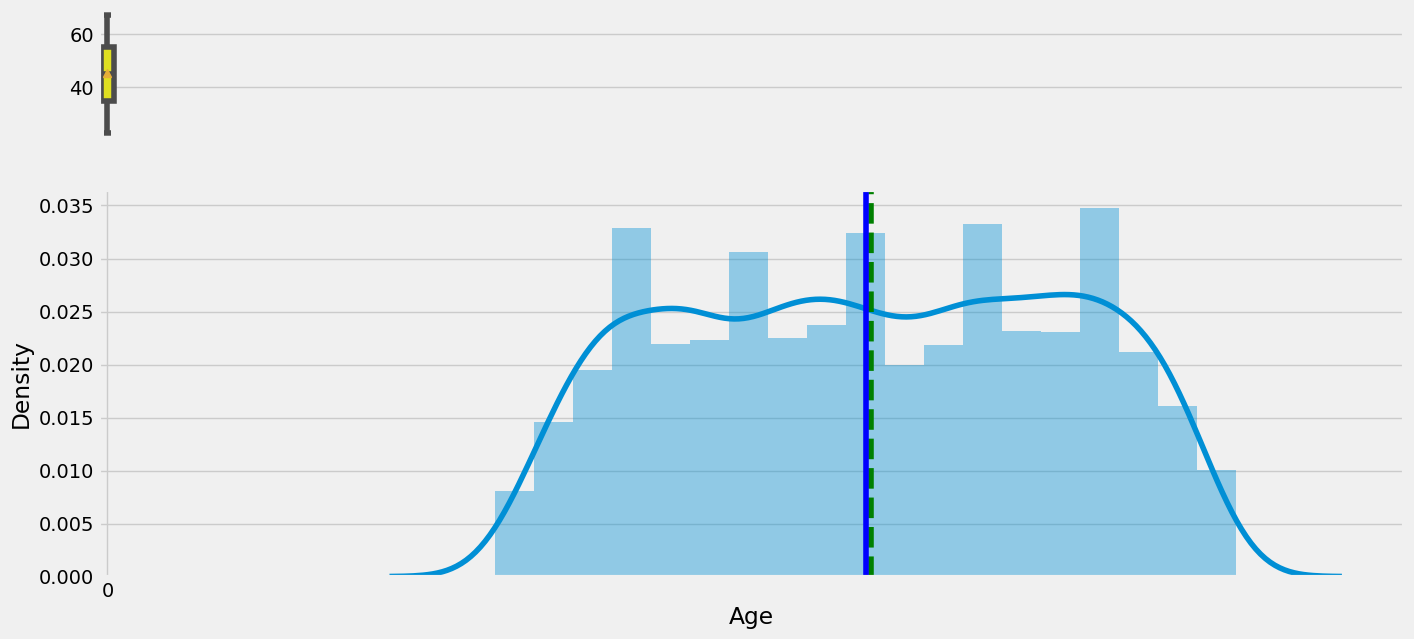

In [31]:
# Create a combined boxplot and histogram plot for the 'Age' column
histogram_boxplot(df.Age)

Outliers are not visible for the age column and the average age seems to be around 45 years old.

<ipython-input-29-1d215e6707da>:16: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




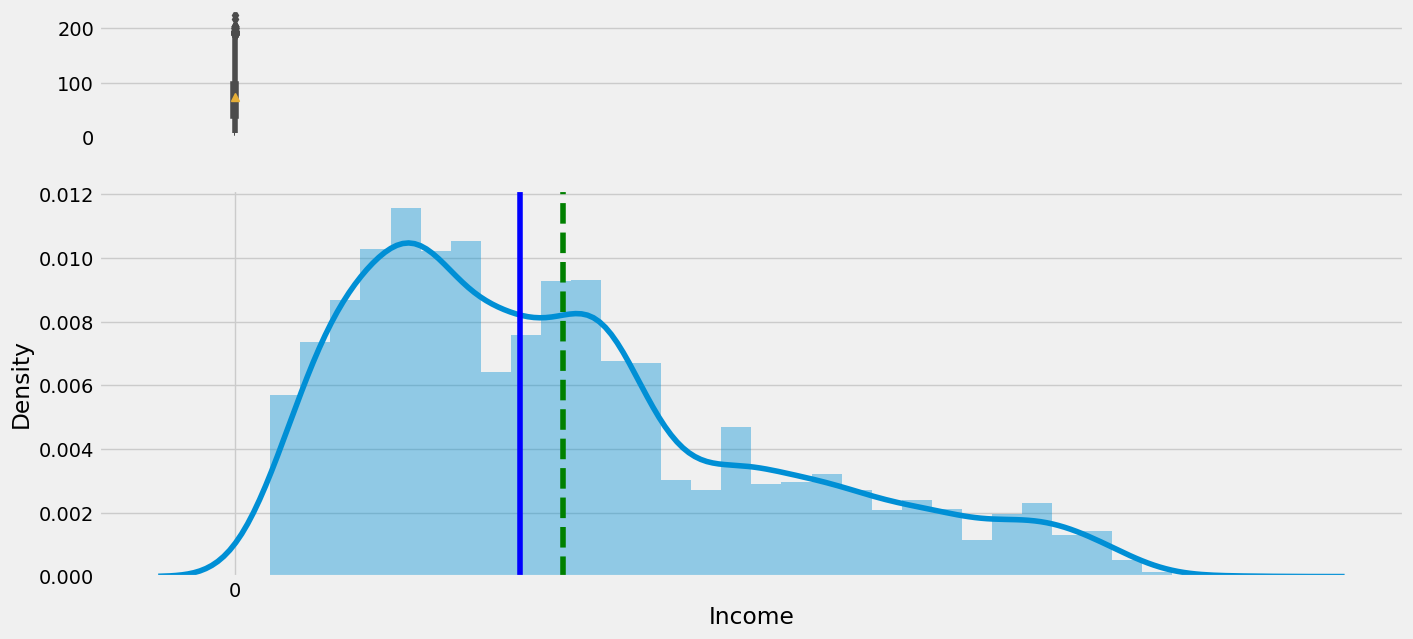

In [32]:
histogram_boxplot(df.Income)


The average of the income column is about 60 thousand and its median is 70 thousand. This column has many outliers.

In [33]:
outliers = create_outliers('Income')
outliers.sort_values(by='Income', ascending=False).head(20)

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
3896   48          24     224     93940       2   6.67          1         0   
4993   45          21     218     91801       2   6.67          1         0   
526    26           2     205     93106       1   6.33          1       271   
2988   46          21     205     95762       2   8.80          1       181   
4225   43          18     204     91902       2   8.80          1         0   
677    46          21     204     92780       2   2.80          1         0   
2278   30           4     204     91107       2   4.50          1         0   
3804   47          22     203     95842       2   8.80          1         0   
2101   35           5     203     95032       1  10.00          3         0   
787    45          15     202     91380       3  10.00          3         0   
3608   59          35     202     94025       1   4.70          1       553   
4895   45          20     201     92120       2   2.80          1         0   
2337   43          16     201     95054       1  10.00          2         0   
2447   44          19     201     95819       2   8.80          1         0   
1901   43          19     201     94305       2   6.67          1         0   
1711   27           3     201     95819       1   6.33          1       158   
1716   32           8     200     91330       2   6.50          1       565   
459    35          10     200     91107       2   3.00          1       458   
917    45          20     200     90405       2   8.80          1         0   
4659   28           4     199     92121       1   6.33          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
3896              0                   0           1       1           1  
4993              0                   0           0       1           0  
526               0                   0           0       0           1  
2988              0                   1           0       1           0  
4225              0                   0           0       1           0  
677               0                   0           0       1           0  
2278              0                   0           0       1           0  
3804              0                   0           0       1           0  
2101              1                   0           0       0           0  
787               1                   0           0       0           0  
3608              0                   0           0       0           0  
4895              0                   0           0       1           1  
2337              1                   0           0       0           1  
2447              0                   0           0       1           1  
1901              0                   1           0       1           0  
1711              0                   0           0       1           0  
1716              0                   0           0       1           0  
459               0                   0           0       0           0  
917               0                   0           0       1           1  
4659              0                   0           0       0           0

In [34]:
print(f"There are {outliers.shape[0]} outliers.")


There are 96 outliers.


<ipython-input-29-1d215e6707da>:16: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




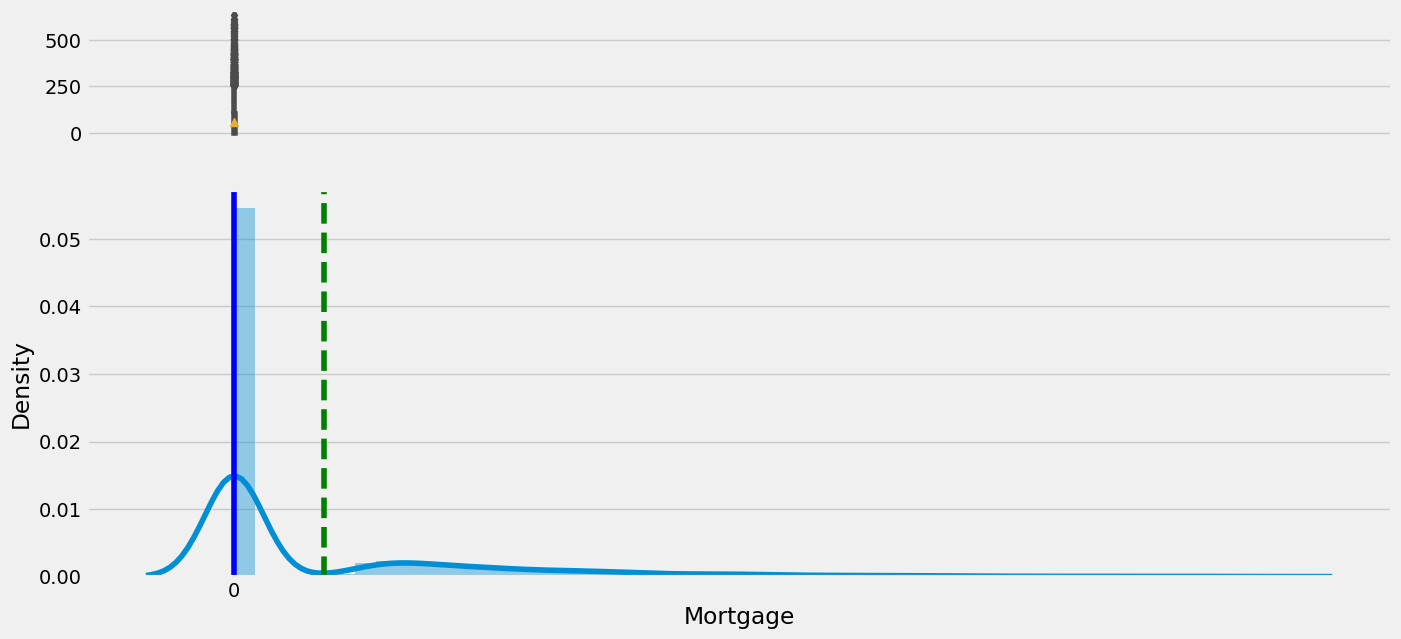

In [35]:
histogram_boxplot(df.Mortgage)


In [36]:
outliers = create_outliers('Mortgage')
outliers.sort_values(by='Mortgage', ascending=False)

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
2934   37          13     195     91763       2    6.5          1       635   
303    49          25     195     95605       4    3.0          1       617   
4812   29           4     184     92126       4    2.2          3       612   
1783   53          27     192     94720       1    1.7          1       601   
4842   49          23     174     95449       3    4.6          2       590   
...   ...         ...     ...       ...     ...    ...        ...       ...   
1522   25           1     101     94720       4    2.3          3       256   
3950   38          14      62     94143       1    1.5          3       255   
2159   61          35      99     94085       1    4.8          3       255   
3138   36          11     103     93555       1    4.6          1       255   
3948   37          12     123     94304       4    3.1          2       253   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
2934              0                   0           0       1           0  
303               1                   0           0       0           0  
4812              1                   0           0       1           0  
1783              0                   0           0       1           0  
4842              1                   0           0       0           0  
...             ...                 ...         ...     ...         ...  
1522              0                   0           0       0           1  
3950              0                   0           0       1           0  
2159              1                   0           0       0           1  
3138              0                   0           0       1           0  
3948              1                   0           1       1           1  

[291 rows x 13 columns]

In [37]:
print(f"There are {outliers.shape[0]} outliers in the outlier column and There are {df[df.Mortgage==0].shape[0]} rows where mortgage equals to ZERO!")


There are 291 outliers in the outlier column and There are 3461 rows where mortgage equals to ZERO!


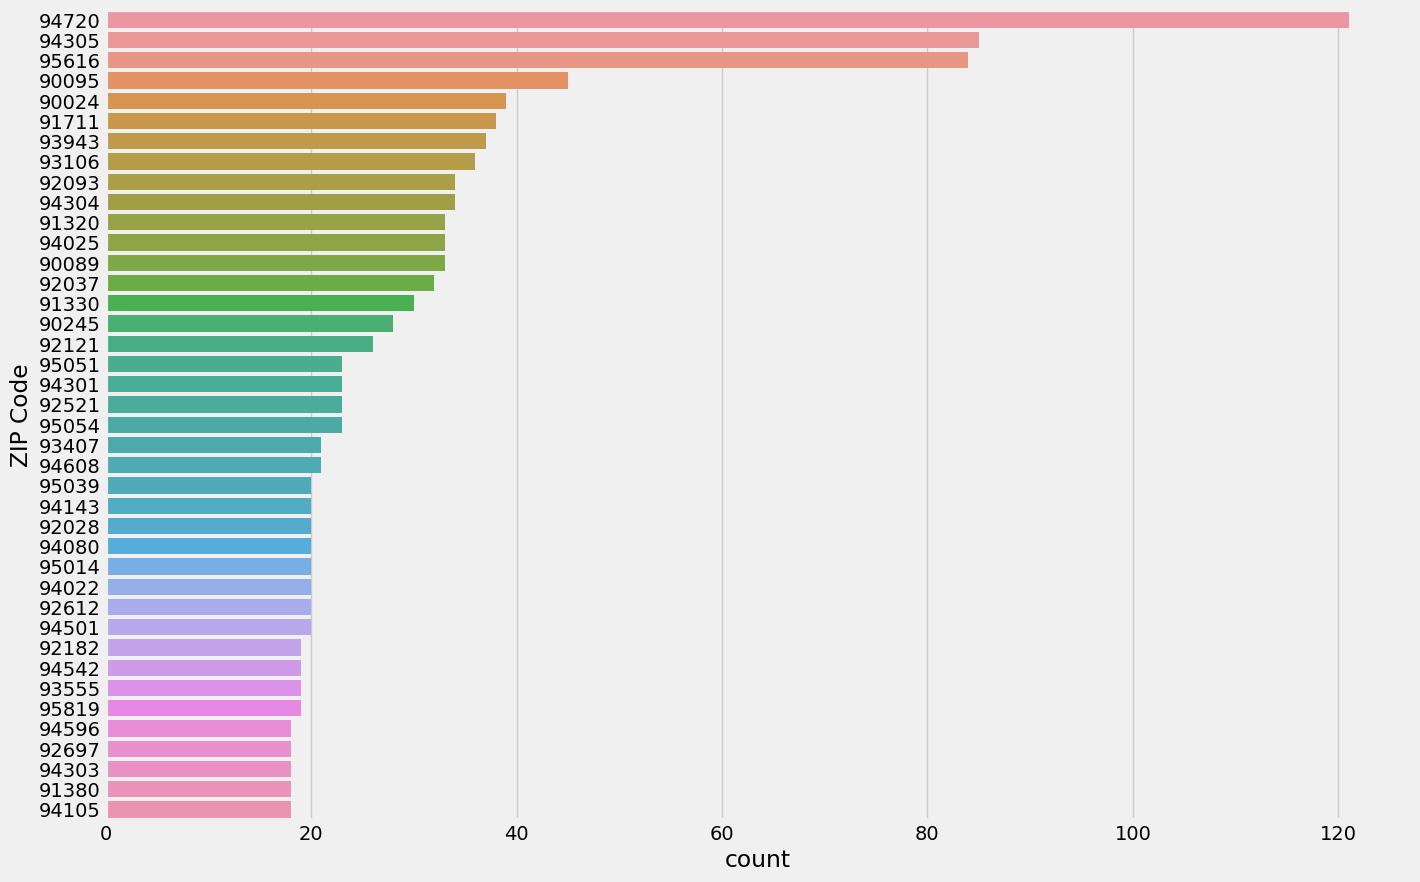

In [38]:
plt.figure(figsize=(15, 10))
sns.countplot(y=df[df.Mortgage==0]['ZIP Code'], 
              data=df, 
              order=df[df.Mortgage==0]['ZIP Code'].value_counts().index[:40]);


The zip code 94720 has the highest amount of zero equity value, which is around 120, and after that, the zip code 94305 follows.

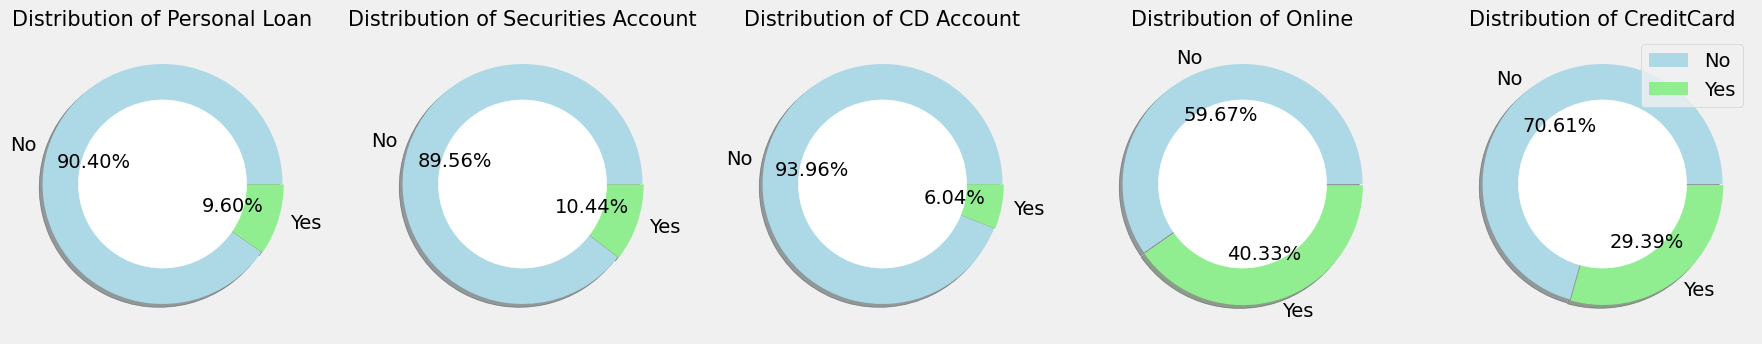

In [39]:

fig, ax = plt.subplots(1,5,figsize=(20,20))
columns = ['Personal Loan','Securities Account','CD Account','Online','CreditCard']

for i,column in enumerate(columns):
    plt.subplot(1,5,i+1)
    size = df[column].value_counts()
    colors = ['lightblue', 'lightgreen']
    labels = "No", "Yes"
    explode = [0, 0.01]

    my_circle = plt.Circle((0, 0), 0.7, color = 'white')

    plt.rcParams['figure.figsize'] = (20, 20)
    plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
    plt.title('Distribution of {}'.format(column), fontsize = 15)
    p = plt.gcf()
    p.gca().add_artist(my_circle)
plt.legend()
plt.show()

<ipython-input-29-1d215e6707da>:16: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




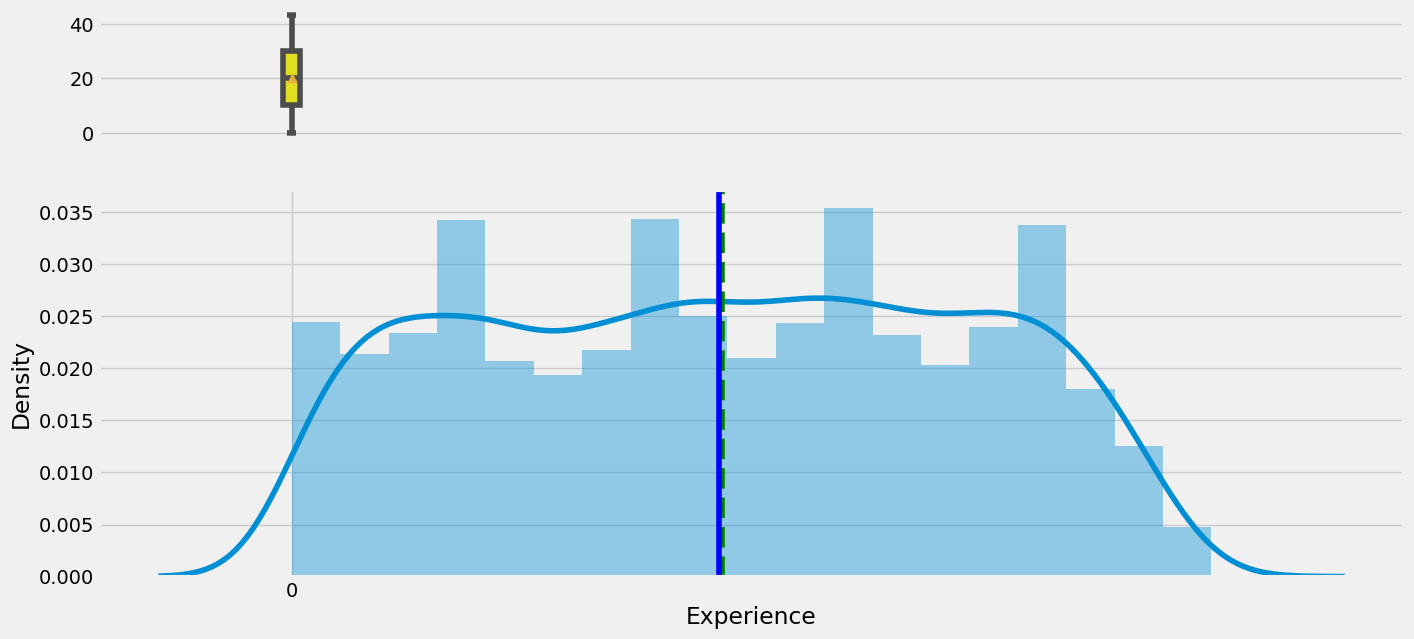

In [40]:
histogram_boxplot(df.Experience)


The work experience column does not have any outliers and the median and mean of its values are close to each other, around 20 years.

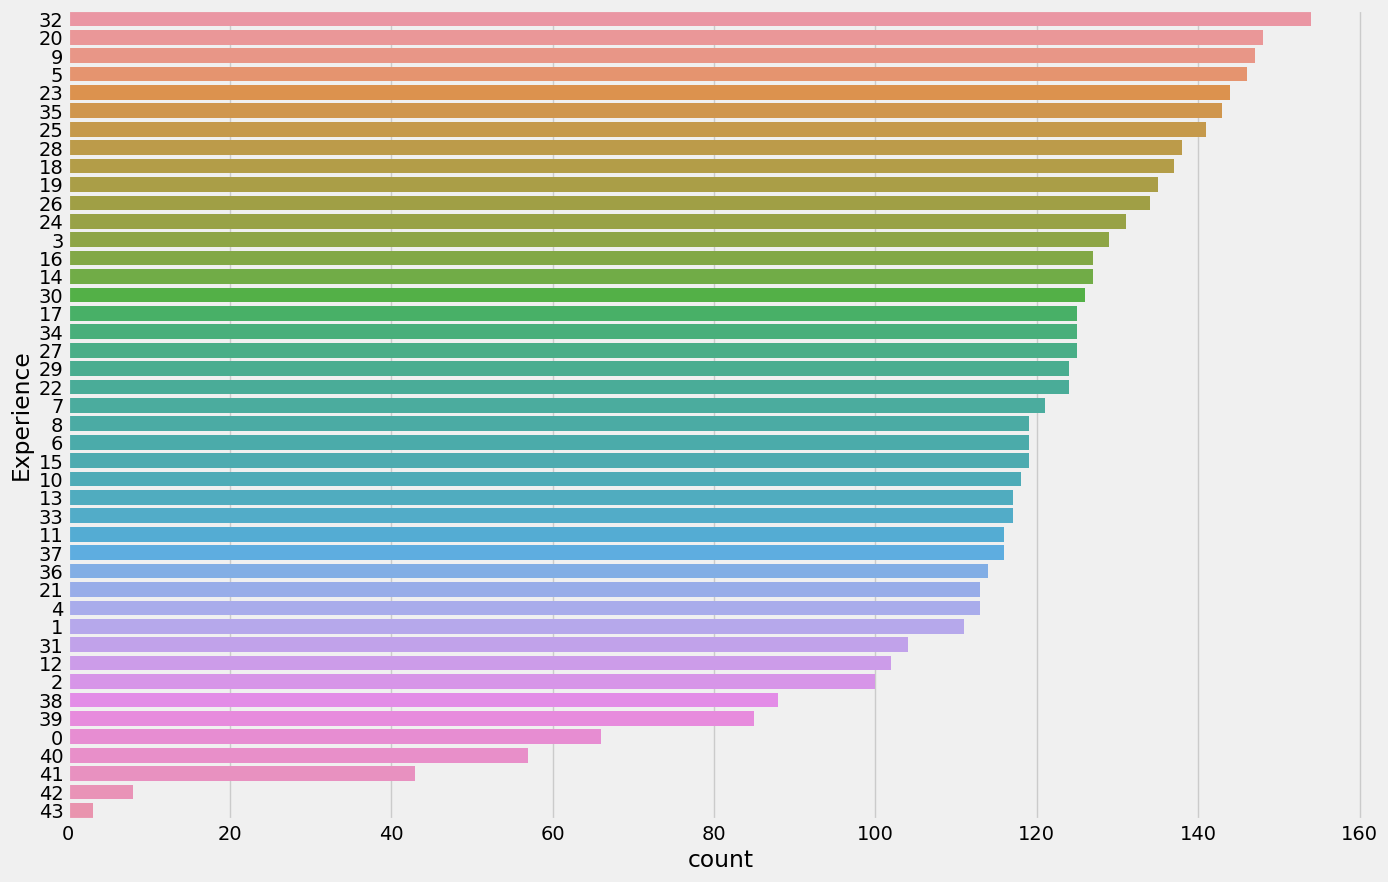

In [41]:
plt.figure(figsize=(15, 10))
sns.countplot(y=df.Experience, 
              data=df, 
              order=df.Experience.value_counts().index[:]);

The plot above shows that 32 years has the highest frequency of work experience, which is around 150.

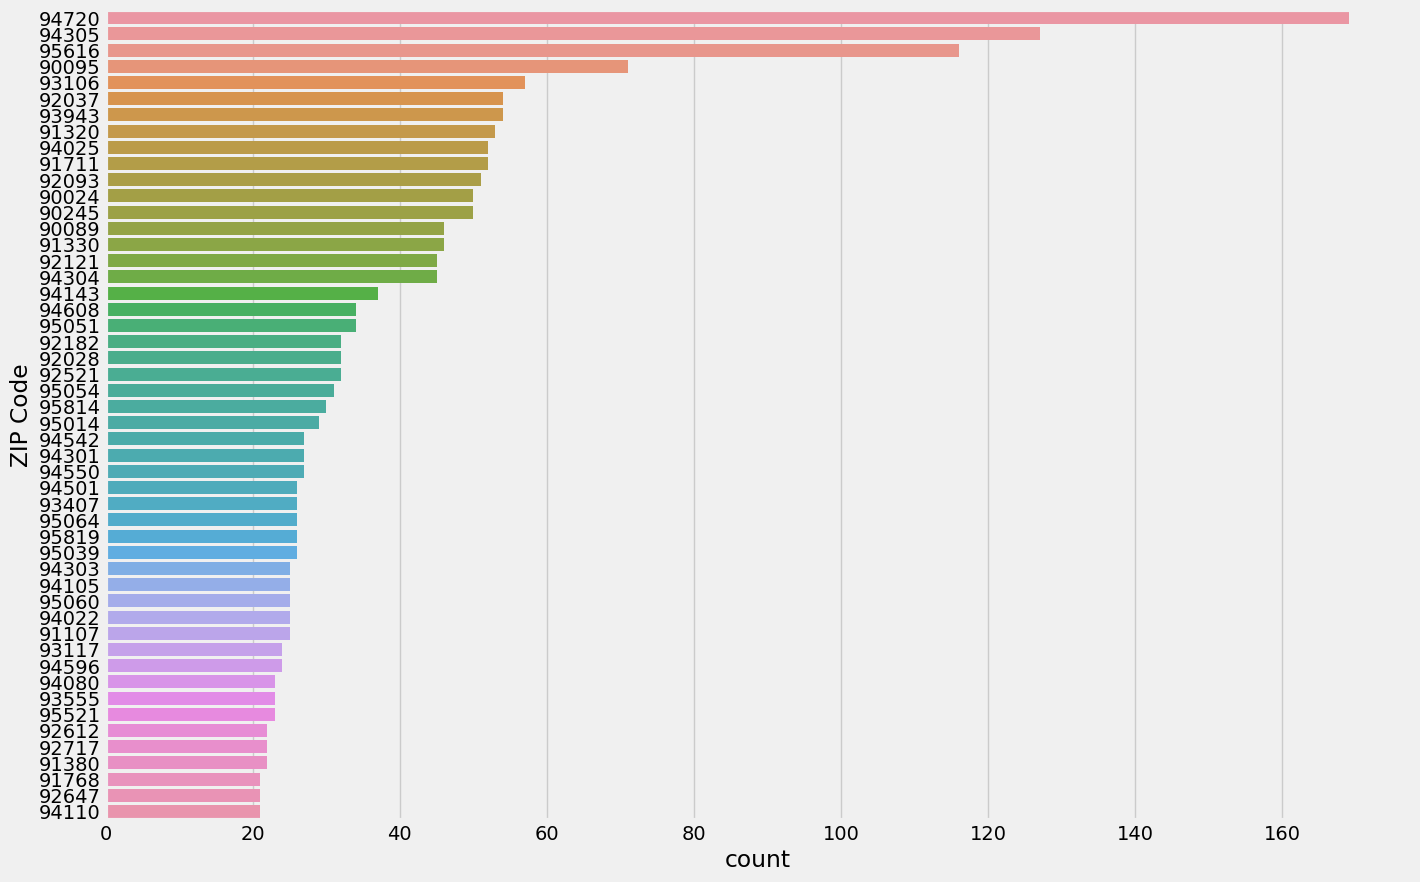

In [51]:
plt.figure(figsize=(15, 10))
sns.countplot(y="ZIP Code", data=df, order=df['ZIP Code'].value_counts().index[0:50]);

The majority of data belongs to zip code 94720, as indicated above, with a zero down payment for the rent of this property.





In [66]:
## Function to plot stacked bar chart
def stacked_plot(x, y):
    """
    Shows stacked plot from x and y pandas data series
    x: pandas data series
    y: pandas data series
    """
    info = pd.crosstab(x, y, margins=True)
    info['% - 0'] = round(info[0]/info['All']*100, 2)
    info['% - 1'] = round(info[1]/info['All']*100, 2)
    print(info)
    print('='*80)
    visual = pd.crosstab(x, y, normalize='index')
    visual.plot(kind='bar', stacked=True, figsize=(10,5));

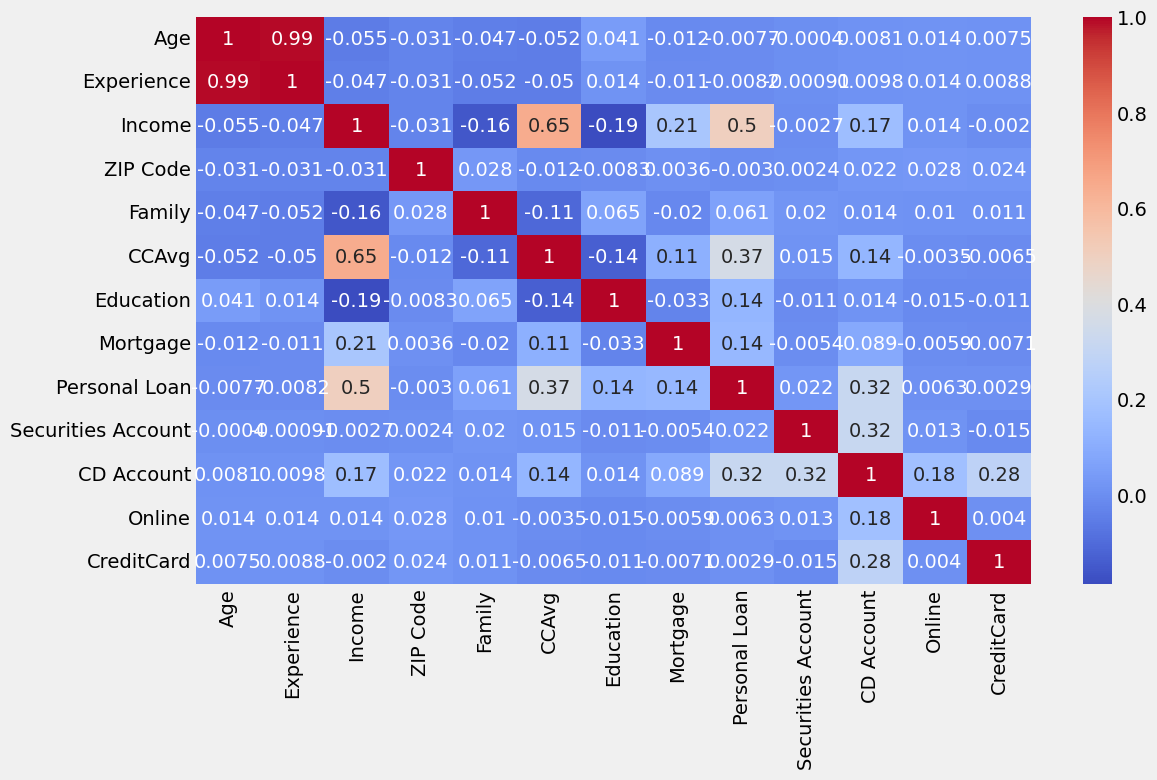

In [67]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm");

Clearly, there is a very direct relationship between people's age and their work experience, and the average use of their card is also closely related to their income.





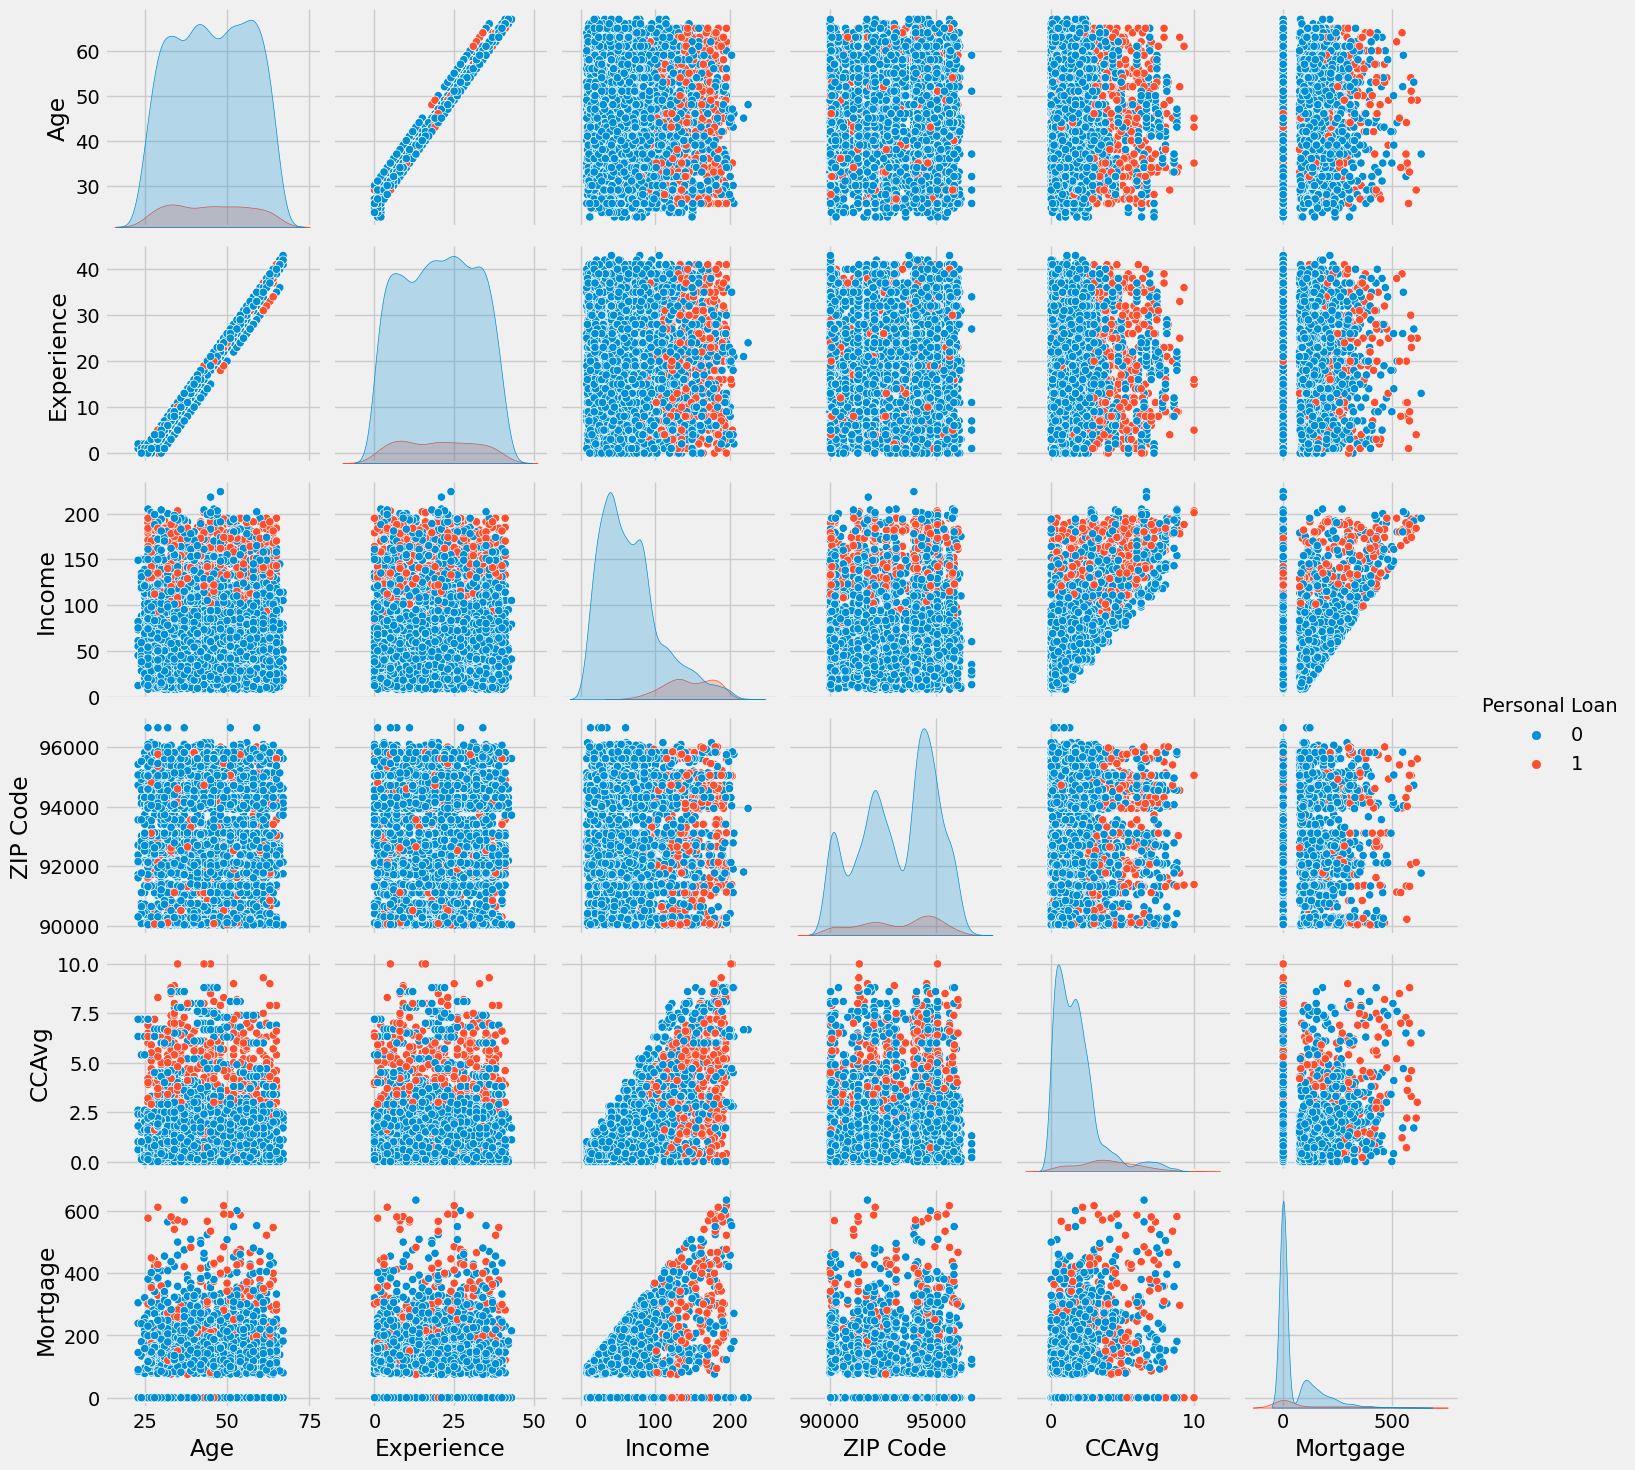

In [68]:
sns.pairplot(data=df[['Age','Experience','Income','ZIP Code','CCAvg','Mortgage','Personal Loan']], 
             hue='Personal Loan');

Based on the above plot, it can be said that individuals with higher income have taken out loans. It also appears that individuals who have used their card more frequently have taken out loans, which requires further investigation.





Personal Loan     0    1   All  % - 0  % - 1
Family                                      
1              1365  107  1472  92.73   7.27
2              1190  106  1296  91.82   8.18
3               877  133  1010  86.83  13.17
4              1087  134  1221  89.03  10.97
All            4519  480  4999  90.40   9.60


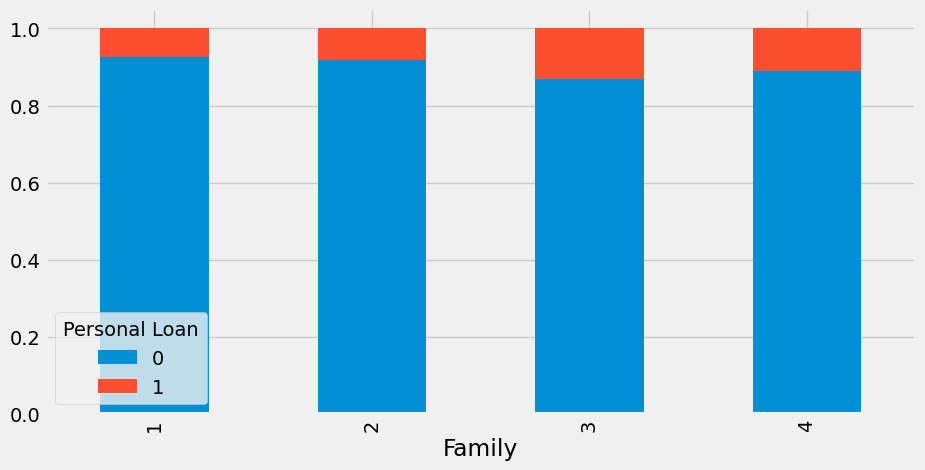

In [69]:
stacked_plot(df.Family, df['Personal Loan'])



It seems that the higher the number of family members, the higher the likelihood of loan approval. According to the above plot, the highest loan approval rate is among individuals with 4 family members.





Personal Loan     0    1   All  % - 0  % - 1
Education                                   
1              2003   93  2096  95.56   4.44
2              1221  182  1403  87.03  12.97
3              1295  205  1500  86.33  13.67
All            4519  480  4999  90.40   9.60


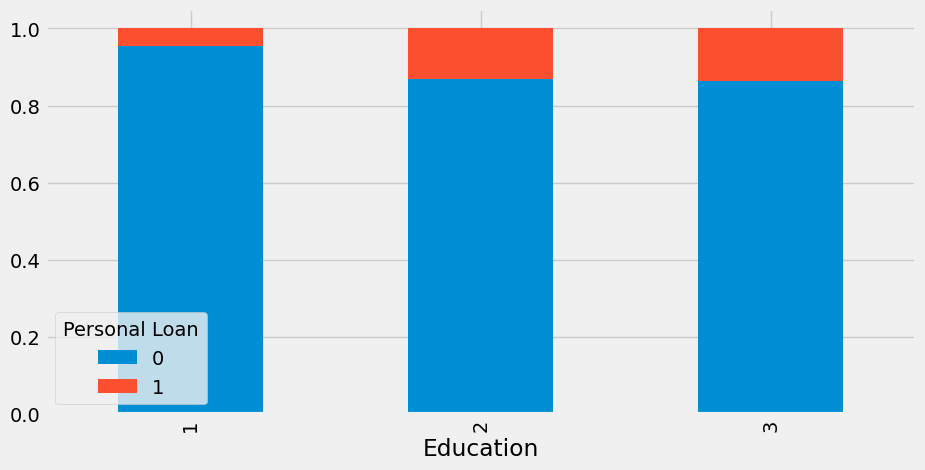

In [70]:
stacked_plot(df.Education, df['Personal Loan'])


It appears that individuals with education level 2 and 3 are more likely to be approved for the loan compared to those with education level 1.





Personal Loan          0    1   All  % - 0  % - 1
Securities Account                               
0                   4057  420  4477  90.62   9.38
1                    462   60   522  88.51  11.49
All                 4519  480  4999  90.40   9.60


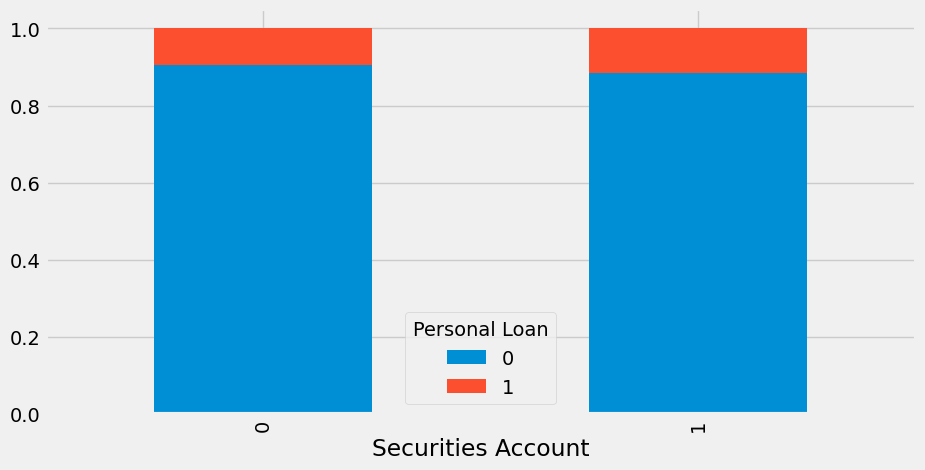

In [71]:
stacked_plot(df['Securities Account'], df['Personal Loan'])


Personal Loan     0    1   All  % - 0  % - 1
CD Account                                  
0              4357  340  4697  92.76   7.24
1               162  140   302  53.64  46.36
All            4519  480  4999  90.40   9.60


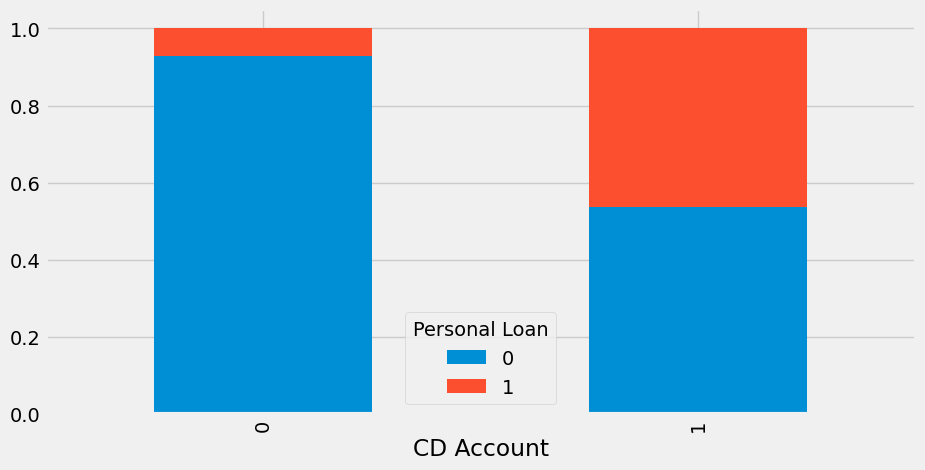

In [72]:
stacked_plot(df['CD Account'], df['Personal Loan'])


Based on the plot provided, it seems that individuals who used savings account have a higher percentage of loan acceptance compared to those who did not use it.





Personal Loan     0    1   All  % - 0  % - 1
Online                                      
0              1827  189  2016  90.62   9.38
1              2692  291  2983  90.24   9.76
All            4519  480  4999  90.40   9.60


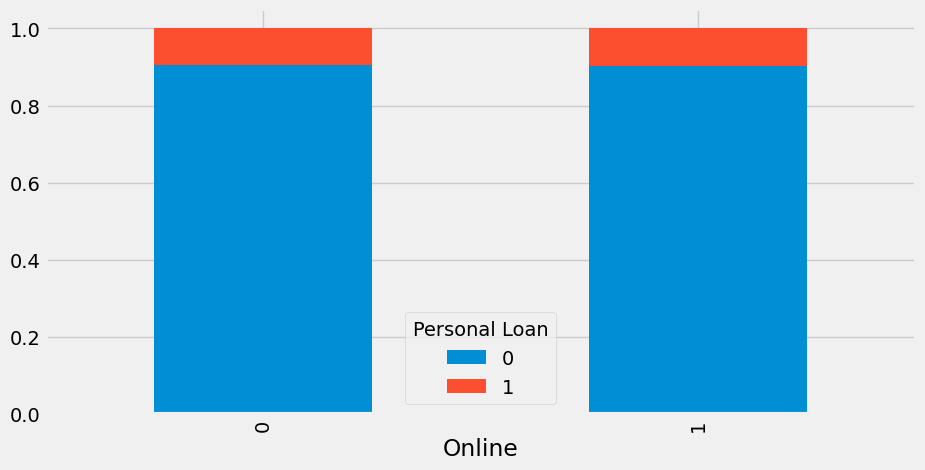

In [73]:
stacked_plot(df.Online, df['Personal Loan'])


Personal Loan     0    1   All  % - 0  % - 1
CreditCard                                  
0              3193  337  3530  90.45   9.55
1              1326  143  1469  90.27   9.73
All            4519  480  4999  90.40   9.60


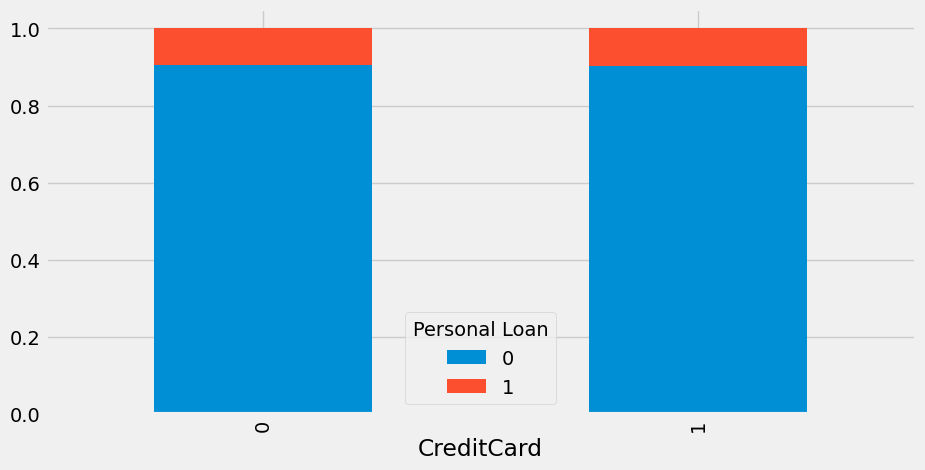

In [74]:
stacked_plot(df.CreditCard, df['Personal Loan'])


# MODEL

In [75]:
# Using dummies method, we convert the Education and Family columns to nominal data to avoid scaling
df1 = pd.get_dummies(df, columns=['Education', 'Family'])
df1.head() 

Age  Experience  Income  ZIP Code  CCAvg  Mortgage  Personal Loan  \
0   25           1      49     91107    1.6         0              0   
1   45          19      34     90089    1.5         0              0   
2   39          15      11     94720    1.0         0              0   
3   35           9     100     94112    2.7         0              0   
4   35           8      45     91330    1.0         0              0   

   Securities Account  CD Account  Online  CreditCard  Education_1  \
0                   1           0       0           0            1   
1                   1           0       0           0            1   
2                   0           0       0           0            1   
3                   0           0       0           0            0   
4                   0           0       0           1            0   

   Education_2  Education_3  Family_1  Family_2  Family_3  Family_4  
0            0            0         0         0         0         1  
1            0            0         0         0         1         0  
2            0            0         1         0         0         0  
3            1            0         1         0         0         0  
4            1            0         0         0         0         1

In [76]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4999 non-null   int64  
 1   Experience          4999 non-null   int64  
 2   Income              4999 non-null   int64  
 3   ZIP Code            4999 non-null   int64  
 4   CCAvg               4999 non-null   float64
 5   Mortgage            4999 non-null   int64  
 6   Personal Loan       4999 non-null   int64  
 7   Securities Account  4999 non-null   int64  
 8   CD Account          4999 non-null   int64  
 9   Online              4999 non-null   int64  
 10  CreditCard          4999 non-null   int64  
 11  Education_1         4999 non-null   uint8  
 12  Education_2         4999 non-null   uint8  
 13  Education_3         4999 non-null   uint8  
 14  Family_1            4999 non-null   uint8  
 15  Family_2            4999 non-null   uint8  
 16  Family

In [77]:
# Separate target variable from independent variables
y = df1.pop('Personal Loan')
X = df1

In [78]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)
print("The shape of X_train: ", X_train.shape)
print("The shape of X_test: ", X_test.shape)

The shape of X_train:  (3499, 17)
The shape of X_test:  (1500, 17)


## Logistic Regression:


In [79]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [80]:
# Make predictions on X_test using the trained model
X_test_pred1 = log_model.predict(X_test)
X_test_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [81]:
# Confusion matrix to evaluate the performance of the classification model
def make_confusion_matrix(model, y_actual, labels=[1, 0], xtest=X_test):
    """
    model : classifier to predict values of X
    y_actual : ground truth  
    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index=["Actual - No","Actual - Yes"], 
                         columns=['Predicted - No','Predicted - Yes'])

    group_counts = [f"{value:0.0f}" for value in cm.flatten()]   
    group_percentages = [f"{value:.2%}" for value in cm.flatten()/np.sum(cm)]
    
    labels = [f"{gc}\n{gp}" for gc, gp in zip(group_counts, group_percentages)]  
    labels = np.asarray(labels).reshape(2,2)
    
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt='')
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14);

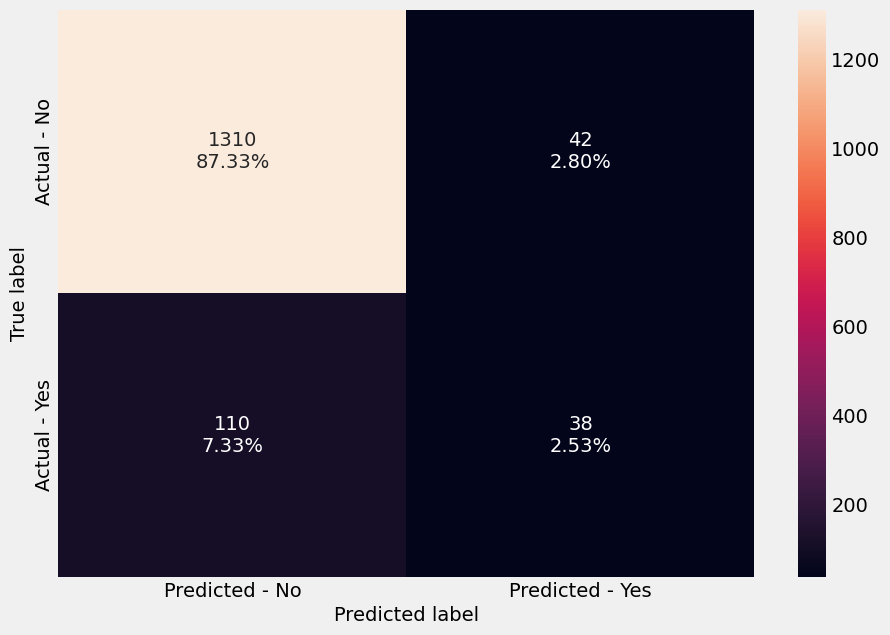

In [82]:
make_confusion_matrix(log_model, y_test)


In [83]:
# Calculate scores for the model
def get_score(model):
    '''
    Prints the recall score from model
    model : classifier to predict values of X
    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Accuracy Score on training set: ", metrics.accuracy_score(y_train, pred_train))
    print("Accuracy Score on test set: ", metrics.accuracy_score(y_test, pred_test))
    print("-------------------------------------------------------------")
    print("Recall on training set: ", metrics.recall_score(y_train, pred_train))
    print("Recall on test set: ", metrics.recall_score(y_test, pred_test))
    print("-------------------------------------------------------------")
    print("F1 Score on training set: ", metrics.f1_score(y_train, pred_train))
    print("F1 Score on test set: ", metrics.f1_score(y_test, pred_test))
    print("-------------------------------------------------------------")
    print("Precision Score on training set: ", metrics.precision_score(y_train, pred_train))
    print("Precision Score on test set: ", metrics.precision_score(y_test, pred_test))


In [84]:
get_score(log_model)

Accuracy Score on training set:  0.9114032580737353
Accuracy Score on test set:  0.8986666666666666
-------------------------------------------------------------
Recall on training set:  0.33433734939759036
Recall on test set:  0.25675675675675674
-------------------------------------------------------------
F1 Score on training set:  0.41729323308270677
F1 Score on test set:  0.33333333333333337
-------------------------------------------------------------
Precision Score on training set:  0.555
Precision Score on test set:  0.475


## KNN:

In [85]:
knn_model = KNeighborsClassifier()

# Defining the hyperparameter range
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

# Grid search with cross-validation
grid = GridSearchCV(knn_model, param_grid, cv=10, scoring='accuracy', return_train_score=False, verbose=1)
grid_search = grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [86]:
# Print the best hyperparameters
print(grid_search.best_params_)

# Calculate and print accuracy of the KNN model on training data
accuracy = grid_search.best_score_ * 100
print("Accuracy for our training dataset with tuning is: {:.2f}%".format(accuracy))


{'n_neighbors': 30}
Accuracy for our training dataset with tuning is: 90.57%


In [87]:
# Fit the KNN model on the training data with the optimal hyperparameters
knn_model = KNeighborsClassifier(n_neighbors=30)
knn_model.fit(X, y)

# Predict the target values for the test data using the trained KNN model
y_test_hat = knn_model.predict(X_test)

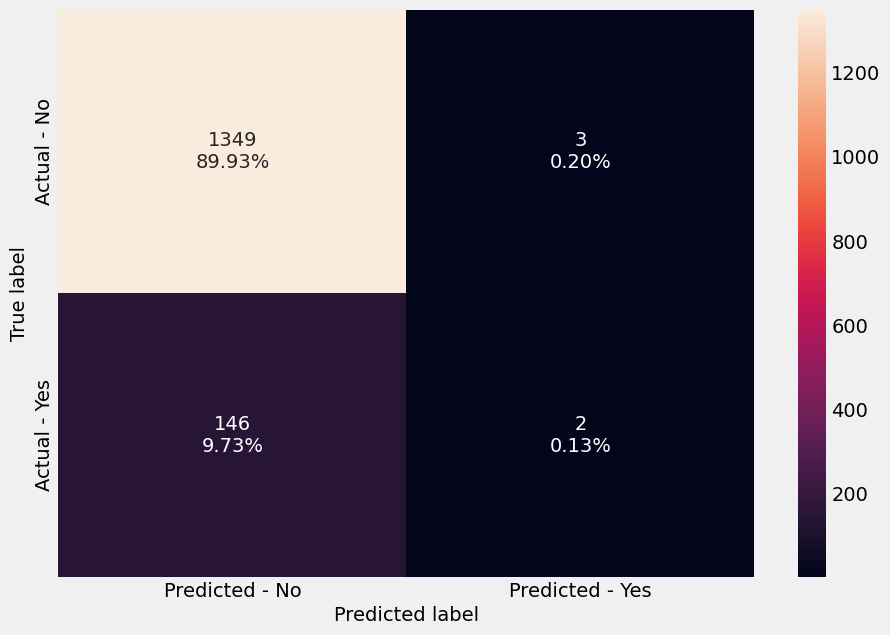

In [88]:
# Print the confusion matrix for the KNN model
make_confusion_matrix(knn_model, y_test)

In [89]:
# Evaluate the performance of the KNN model on the training and test data
get_score(knn_model)

Accuracy Score on training set:  0.9056873392397828
Accuracy Score on test set:  0.9006666666666666
-------------------------------------------------------------
Recall on training set:  0.03614457831325301
Recall on test set:  0.013513513513513514
-------------------------------------------------------------
F1 Score on training set:  0.06779661016949153
F1 Score on test set:  0.026143790849673203
-------------------------------------------------------------
Precision Score on training set:  0.5454545454545454
Precision Score on test set:  0.4


## Naive Bayes:


In [90]:
nb_model = GaussianNB()

# Fit the Naive Bayes model on the training data
nb_model.fit(X_train, y_train)

GaussianNB()

In [91]:
# Predict the target values for the test data using the trained Naive Bayes model
X_test_pred2 = nb_model.predict(X_test)

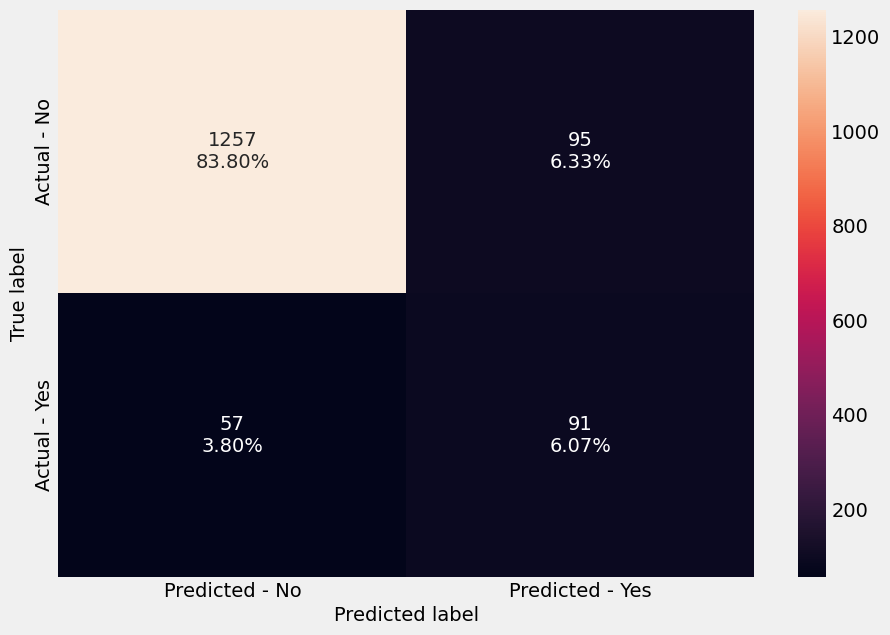

In [92]:
# Print the confusion matrix for the Naive Bayes model
make_confusion_matrix(nb_model, y_test)

In [93]:
# Evaluate the performance of the Naive Bayes model on the training and test data
get_score(nb_model)

Accuracy Score on training set:  0.9045441554729923
Accuracy Score on test set:  0.8986666666666666
-------------------------------------------------------------
Recall on training set:  0.6024096385542169
Recall on test set:  0.6148648648648649
-------------------------------------------------------------
F1 Score on training set:  0.544959128065395
F1 Score on test set:  0.5449101796407185
-------------------------------------------------------------
Precision Score on training set:  0.4975124378109453
Precision Score on test set:  0.489247311827957


## Decision Trees:


In [94]:
# Choose the type of classifier.
dts_model = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(1,10),
              'criterion': ['entropy','gini'],
              'splitter': ['best','random'],
              'min_impurity_decrease': [0.000001,0.00001,0.0001],
              'max_features': ['log2','sqrt']}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dts_model, param_grid=parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dts_model = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dts_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, max_features='log2',
                       min_impurity_decrease=1e-06, random_state=1)

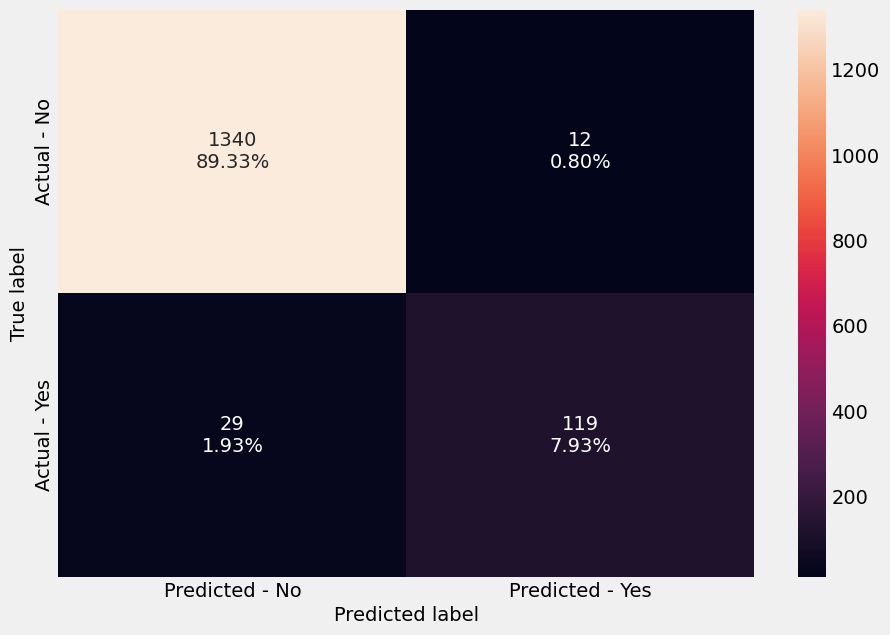

In [95]:
# Show confusion matrix for decision tree model
make_confusion_matrix(dts_model, y_test)

In [96]:
# Get accuracy, recall, f1-score and precision of decision tree model on training and test sets
get_score(dts_model)

Accuracy Score on training set:  0.9908545298656759
Accuracy Score on test set:  0.9726666666666667
-------------------------------------------------------------
Recall on training set:  0.9036144578313253
Recall on test set:  0.8040540540540541
-------------------------------------------------------------
F1 Score on training set:  0.9493670886075949
F1 Score on test set:  0.8530465949820789
-------------------------------------------------------------
Precision Score on training set:  1.0
Precision Score on test set:  0.9083969465648855


In [97]:
# Get the feature names
feature_names = list(X.columns)
print(feature_names)

['Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Education_1', 'Education_2', 'Education_3', 'Family_1', 'Family_2', 'Family_3', 'Family_4']


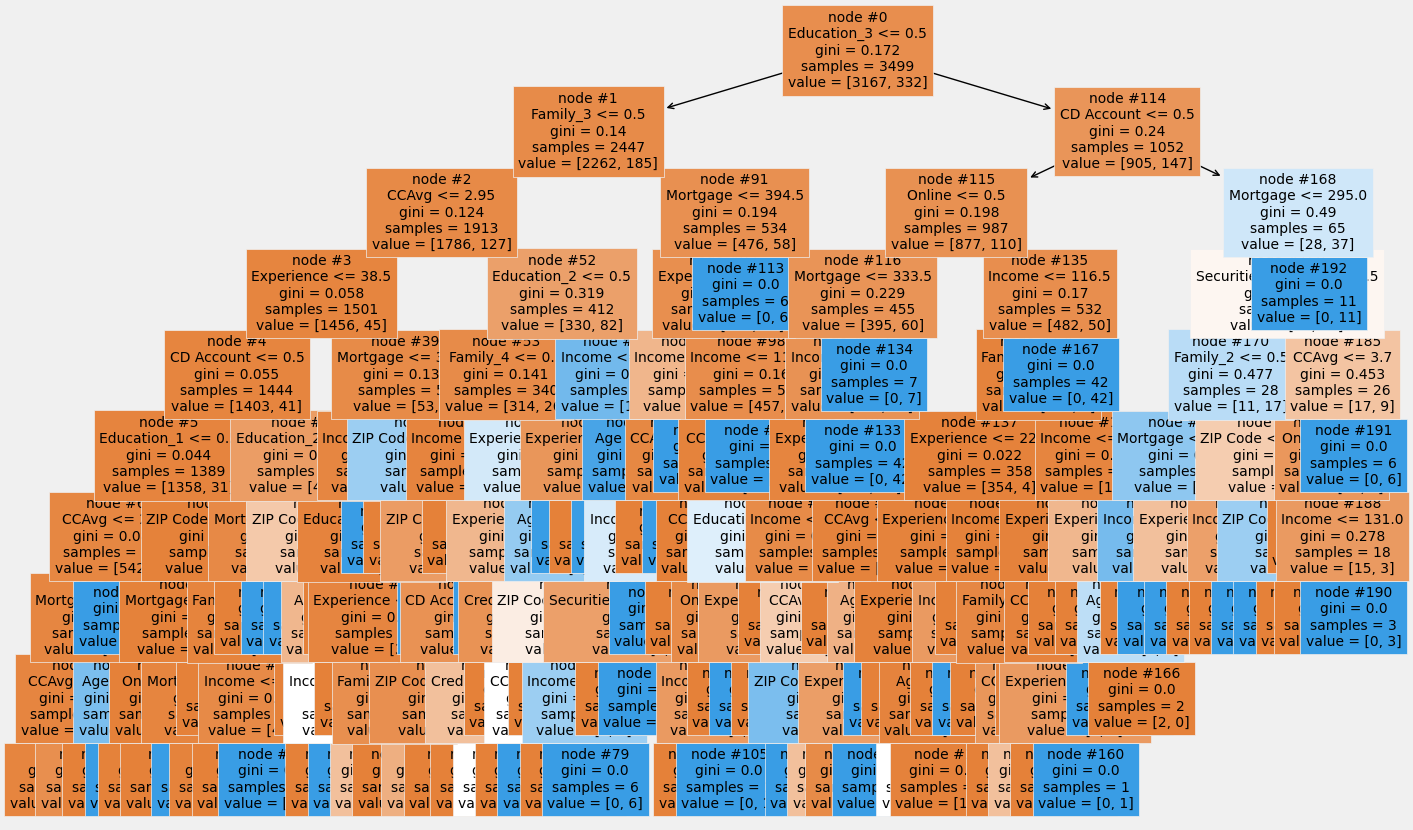

In [98]:
# Show decision tree graph
plt.figure(figsize=(15, 10))
out = tree.plot_tree(dts_model,
                     feature_names=feature_names,
                     filled=True,
                     fontsize=10,
                     node_ids=True,
                     class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

## Random Forest:


In [99]:
# Choose the type of classifier.
rf_model = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': [100, 500],'max_depth': np.arange(1,10),
              'criterion': ['entropy','gini'],
              'max_features': ['log2','sqrt']}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

In [100]:
# Run the grid search
grid_obj = GridSearchCV(rf_model, param_grid=parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_model = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_model.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=9, max_features='log2',
                       n_estimators=500, random_state=1)

In [101]:
# Print best parameters found
print(grid_obj.best_params_)

{'criterion': 'entropy', 'max_depth': 9, 'max_features': 'log2', 'n_estimators': 500}


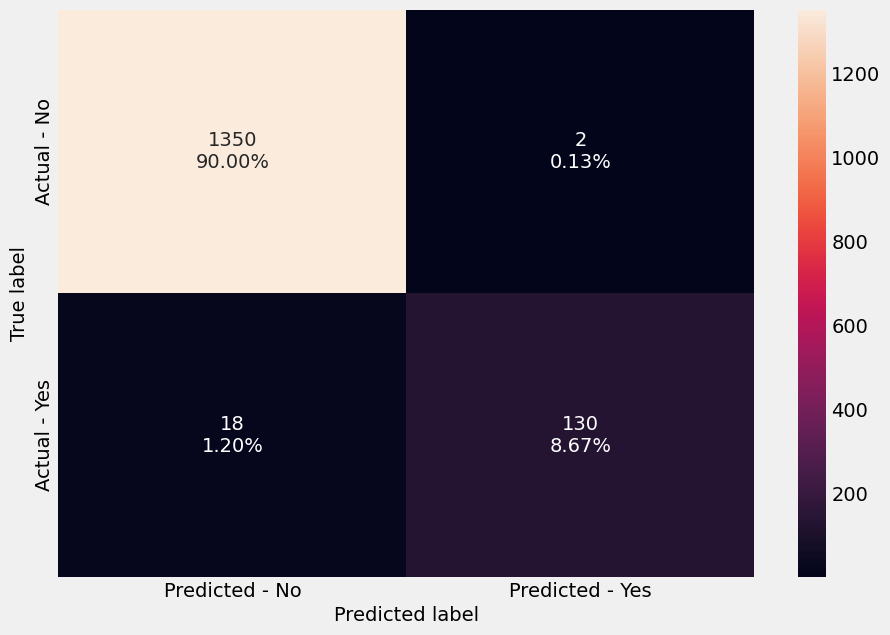

In [102]:
# Show confusion matrix for random forest model
make_confusion_matrix(rf_model, y_test)

In [103]:
# Get accuracy, recall, f1-score and precision of random forest model on training and test sets
get_score(rf_model)

Accuracy Score on training set:  0.9965704486996285
Accuracy Score on test set:  0.9866666666666667
-------------------------------------------------------------
Recall on training set:  0.963855421686747
Recall on test set:  0.8783783783783784
-------------------------------------------------------------
F1 Score on training set:  0.9815950920245399
F1 Score on test set:  0.9285714285714285
-------------------------------------------------------------
Precision Score on training set:  1.0
Precision Score on test set:  0.9848484848484849


## SVM:


In [104]:
# Define SVM model with RBF kernel and regularization parameter C=10
svm_model = SVC(kernel='rbf', C=10)

# Create a dictionary of hyperparameters to be tuned using grid search
parameters = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

# Define recall score as the evaluation metric to be used in grid search
scorer = metrics.make_scorer(metrics.recall_score)

# Perform grid search to find the best combination of hyperparameters for the SVM model
grid_obj = GridSearchCV(svm_model, param_grid=parameters, scoring=scorer, refit=True, verbose=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the SVM model to the best estimator found by grid search
svm_model = grid_obj.best_estimator_

# Retrain the SVM model with the best hyperparameters on the training data
svm_model.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.000 total time=   1.9s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.000 total time=   1.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.000 total time=   0.9s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.000 total time=   1.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.000 total time=   0.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.000 total time=   0.5s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.000 total time=   0.5s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.000 total time=   0.5s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.000 total time=   0.6s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.000 total time=   0.5s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.000 total time=   0.5s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

SVC(C=1000, gamma=0.0001)

In [105]:
# Print the best hyperparameters found by grid search
print(grid_obj.best_params_)

# Print the final SVM model with the best hyperparameters
print(grid_obj.best_estimator_)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.0001)


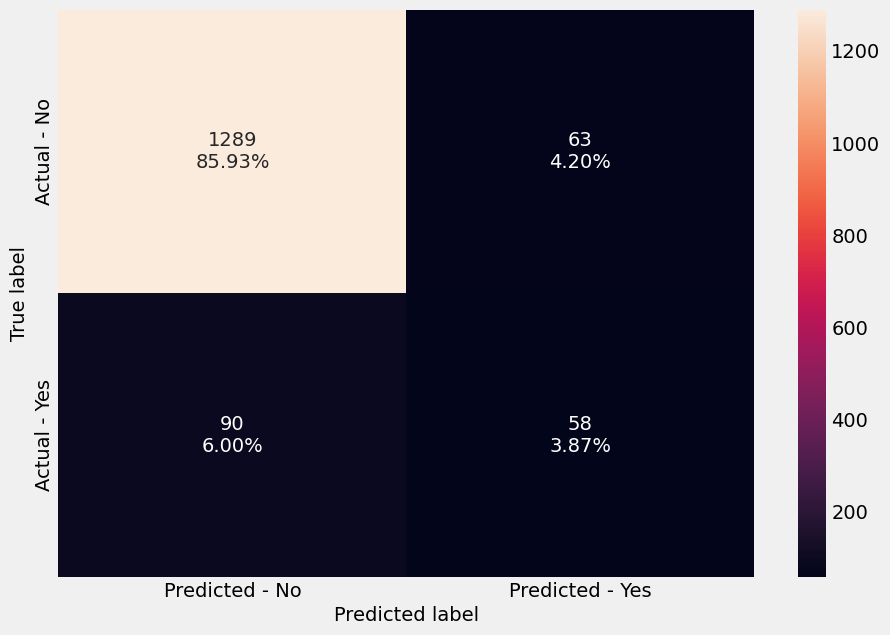

In [106]:
# Evaluate the performance of the SVM model on the test set using confusion matrix
make_confusion_matrix(svm_model, y_test)

In [107]:
# Evaluate the performance of the SVM model on the training and test sets using accuracy, recall, F1 score, and precision metrics
get_score(svm_model)

Accuracy Score on training set:  0.9948556730494427
Accuracy Score on test set:  0.898
-------------------------------------------------------------
Recall on training set:  0.9518072289156626
Recall on test set:  0.3918918918918919
-------------------------------------------------------------
F1 Score on training set:  0.9723076923076922
F1 Score on test set:  0.43122676579925656
-------------------------------------------------------------
Precision Score on training set:  0.9937106918238994
Precision Score on test set:  0.4793388429752066


The best model was Random Forest, so we will process the new data with it.


# New Data

In [108]:
test_df=pd.DataFrame(pd.read_csv('/content/sample_data/Bank_Personal_Loan_Modelling_Test.csv'))
test_df

Age  Experience  Income  ZIP Code  CCAvg  Mortgage  Personal Loan  \
0   42          16      30     92037    1.2         0              0   

   Securities Account  CD Account  Online  CreditCard  Education_1  \
0                   1           0       1           1            0   

   Education_2  Education_3  Family_1  Family_2  Family_3  Family_4  
0            0            1         0         0         1         0

In [109]:
X_test1=test_df.drop('Personal Loan',axis=1)
X_test1

Age  Experience  Income  ZIP Code  CCAvg  Mortgage  Securities Account  \
0   42          16      30     92037    1.2         0                   1   

   CD Account  Online  CreditCard  Education_1  Education_2  Education_3  \
0           0       1           1            0            0            1   

   Family_1  Family_2  Family_3  Family_4  
0         0         0         1         0

In [110]:
# Random Forest
y_predict_final = rf_model.predict(X_test1)
print ('This customer Loan is:',y_predict_final)

This customer Loan is: [0]


In [111]:
#KNN
y_predict_final = knn_model.predict(X_test1)
print ('This customer Loan is:',y_predict_final)

This customer Loan is: [0]


In [112]:
#Decision Trees
y_predict_final = dts_model.predict(X_test1)
print ('This customer Loan is:',y_predict_final)

This customer Loan is: [0]


In [113]:
#Logistic Regression
y_predict_final = log_model.predict(X_test1)
print ('This customer Loan is:',y_predict_final)

This customer Loan is: [0]


In [114]:
#Naive Bayes
y_predict_final = nb_model.predict(X_test1)
print ('This customer Loan is:',y_predict_final)

This customer Loan is: [0]


In [116]:
#SVM
y_predict_final = svm_model.predict(X_test1)
print ('This customer Loan is:',y_predict_final)

This customer Loan is: [0]


### This individual is not guaranteed to be approved for the loan in any of the models with their new specifications.



